## Titanic investigation

In [ ]:
#data from https://www.kaggle.com/c/titanic
#reproducing/combining parts from from tutorials: 
#https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
#and: https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish 

In [1]:
#Normal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Modelling algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import the data, make a new df with both test and train joined together

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

full = train.append(test, ignore_index = True)
titanic = full[:891]

print('Datasets: full: ',full.shape, ' titanic: ',titanic.shape)

Datasets: full:  (1309, 12)  titanic:  (891, 12)


In [4]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [5]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


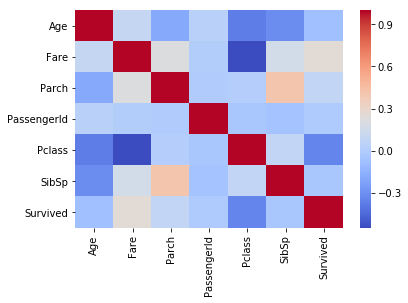

In [6]:
sns.heatmap(titanic.corr(), cmap='coolwarm')

In [7]:
#Parch and SibSp correlated
#Fare most correlated with survived, Pclass most negatively correlated

In [8]:
#Lets try and visualise the data

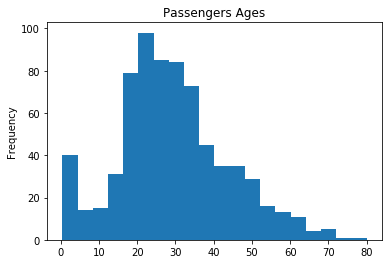

In [9]:
titanic.Age.plot(kind='hist',title='Passengers Ages', bins=20)

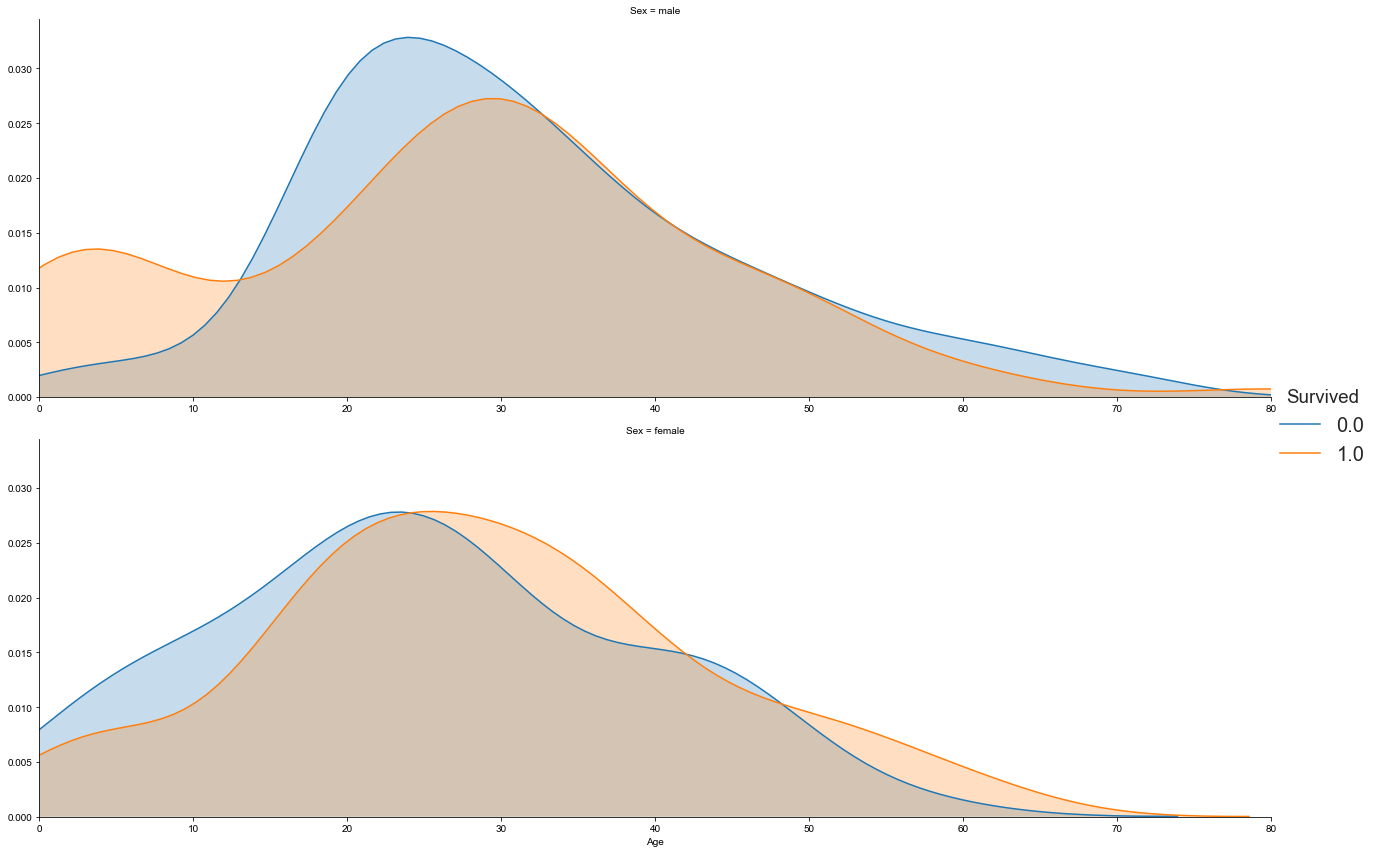

In [10]:
fig1 = sns.FacetGrid(data=titanic,row='Sex',hue='Survived',size=6, aspect=3)
fig1.map(sns.kdeplot,'Age',shade=True)
fig1.set(xlim=(0,titanic['Age'].max()))
sns.set(font_scale = 2)
fig1.add_legend()

In [11]:
#There is separation, so should be possible to predict. 
#Less of a bump for surviving young females than males? 

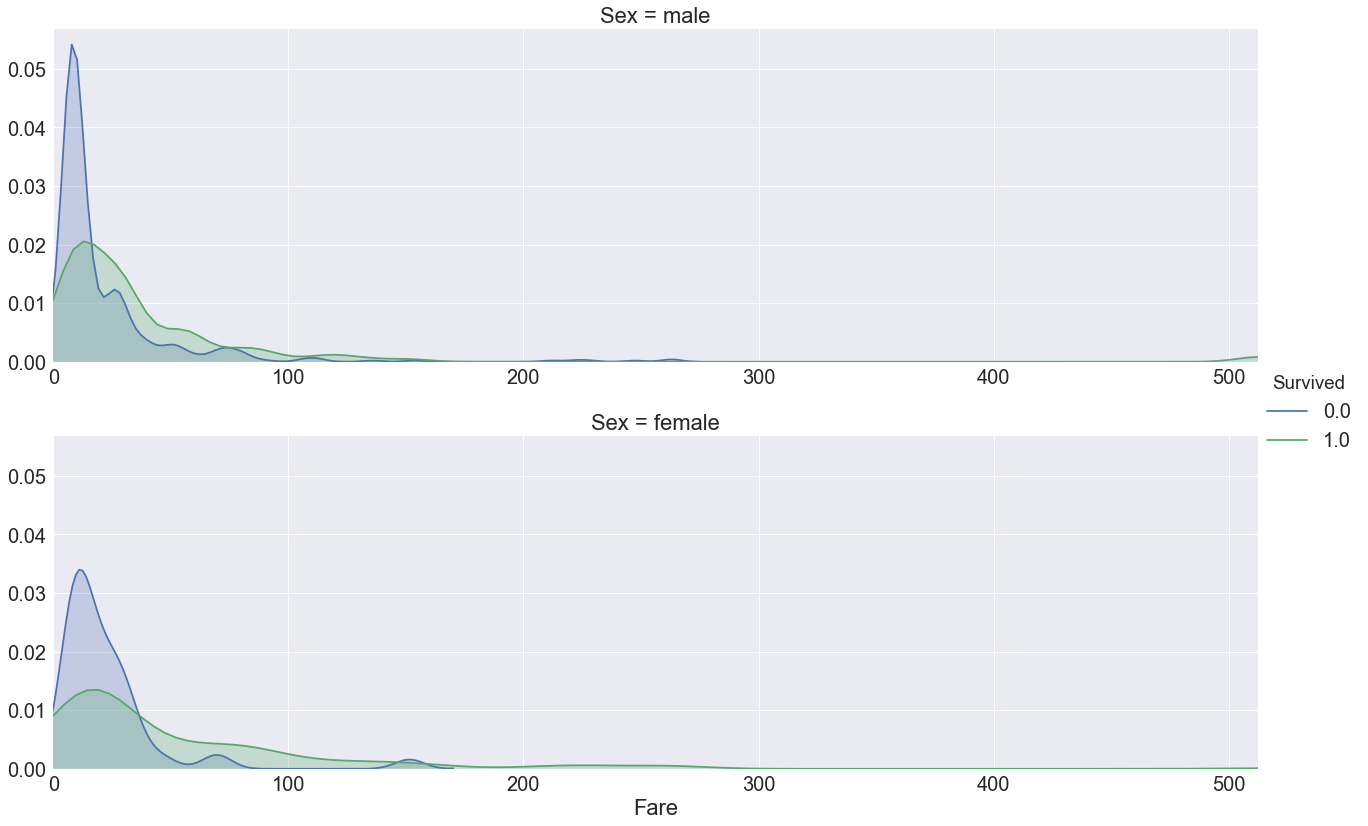

In [12]:
fig1 = sns.FacetGrid(data=titanic,row='Sex',hue='Survived',size=6, aspect=3)
fig1.map(sns.kdeplot,'Fare',shade=True)
fig1.set(xlim=(0,titanic['Fare'].max()))
sns.set(font_scale = 2)
fig1.add_legend()

In [13]:
#higher fare, higher chance of surviving it seems

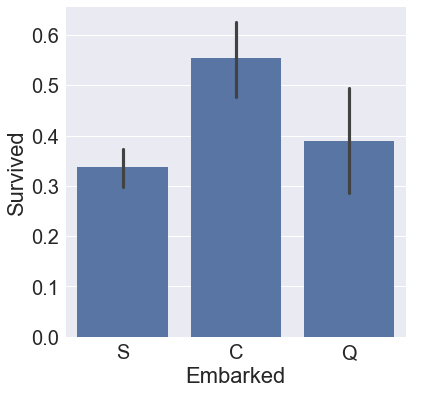

In [14]:
fig2 = sns.FacetGrid(titanic, size=6)
fig2.map(sns.barplot, 'Embarked', 'Survived')
fig2.add_legend()
sns.set(font_scale = 1.5)

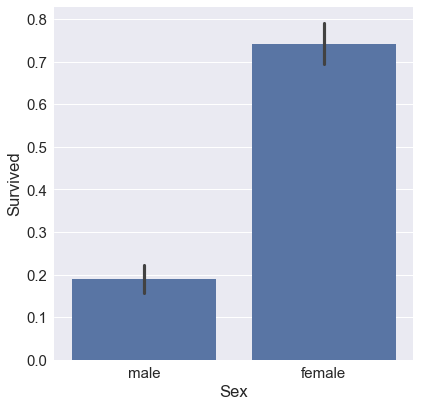

In [15]:
fig3 = sns.FacetGrid(titanic, size=6)
fig3.map(sns.barplot, 'Sex', 'Survived')
fig3.add_legend()

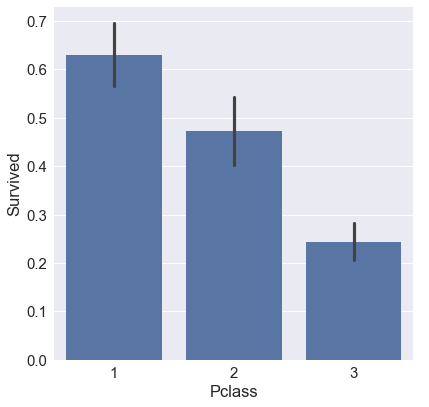

In [16]:
fig4 = sns.FacetGrid(titanic, size=6)
fig4.map(sns.barplot, 'Pclass', 'Survived')
fig4.add_legend()

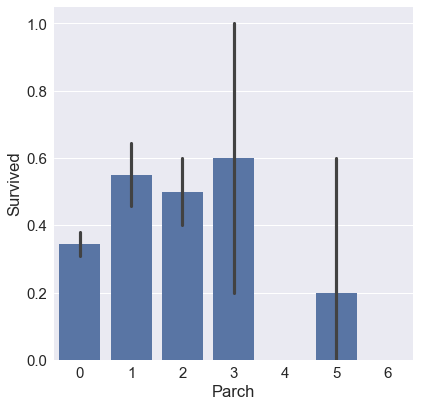

In [17]:
fig5 = sns.FacetGrid(titanic, size=6)
fig5.map(sns.barplot, 'Parch', 'Survived')
fig5.add_legend()

In [18]:
#ok, time to transform the data. First Sex into binary

In [19]:
sex = full['Sex'].replace(['male','female'],['1','0'])

In [20]:
#one hot encode Embarked and Pclass cols

In [21]:
embarked = pd.get_dummies(full.Embarked, prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
pclass = pd.get_dummies(full.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [23]:
#Time to deal with missing values, lets impute missing ages and fares with mean

In [24]:
imputed = pd.DataFrame()

imputed['Age'] = full.Age.fillna(full.Age.mean())
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [25]:
#Feature engineering. Start with title, could reflect social status

title = pd.DataFrame()

title['Title'] = full['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
title.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [26]:
set(title['Title'])

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [27]:
#some special titles there, lets use a dictionary to map them all 
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
}

In [28]:
title['Title'] = title.Title.map(Title_Dictionary)
title = pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [29]:
#extracting cabin data. Need an Unknown class too.

cabin = pd.DataFrame()
cabin['Cabin'] = full.Cabin.fillna('U')
cabin['Cabin'] = cabin['Cabin'].map(lambda x: x[0])
cabin = pd.get_dummies(cabin.Cabin, prefix = 'Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [30]:
#extract ticket class from ticket number

In [31]:
#a helper function that extracts the ticket prefix, returns 'XXX' if no prefix
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda x: x.strip(), ticket)
    ticket = list(filter(lambda x: not x.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [32]:
ticket = pd.DataFrame()
ticket['Ticket'] = full['Ticket'].map(cleanTicket)
ticket = pd.get_dummies(ticket['Ticket'], prefix='Ticket')
ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Multiple cols are related to family size. Lets make one family size col

In [34]:
family = pd.DataFrame()

family['FamilySize'] = full['Parch'] + full['SibSp'] + 1
    #Including passenger themselves

In [35]:
#helper function to split families into size groups

In [36]:
def FamilySize(n):
    if n == 1:
        return 'Single'
    elif 2 <= n <= 4:
        return 'Small'
    else:
        return 'Large'

In [37]:
family['FamilySize'] = family['FamilySize'].map(FamilySize)
family = pd.get_dummies(family.FamilySize)
family.head()

,Large,Single,Small
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [38]:
#Making the new df with variables for machine learning algorithms
# from imputed , embarked , pclass , sex , family , cabin , ticket

In [39]:
full_X = pd.concat([imputed, embarked, pclass, sex, family, cabin, ticket, title],axis=1)
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex,Large,...,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,35.0,53.1000,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,35.0,8.0500,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [40]:
train_valid_X = full_X[0:891]
train_valid_y = titanic.Survived
test_X = full_X[891:]
train_X, valid_X, train_y, valid_y = train_test_split(
    train_valid_X, train_valid_y, test_size=0.3)

combined_X = train_X.append(valid_X)
combined_y = train_y.append(valid_y)

print(full_X.shape, train_X.shape, valid_X.shape, train_y.shape, valid_y.shape, test_X.shape, combined_X.shape, combined_y.shape)

(1309, 64) (623, 64) (268, 64) (623,) (268,) (418, 64) (891, 64) (891,)


In [41]:
#Now to try some basic models. nb. Rewrote to change train/test split into kfold cross validation for consistency

In [42]:
model_acc = pd.DataFrame(columns=['basic_acc','revised_acc','tuned_acc','tuned_params','best_acc'])

In [43]:
name = 'rfc'
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
print('train:',model.score(train_X, train_y), 
      'test:',model.score(valid_X, valid_y))

cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
print('cv:',cv_score)

model_acc.loc[name,'basic_acc']=cv_score

train: 0.993579454254 test: 0.820895522388
cv: 0.822676429106


In [44]:
name = 'gbc'
model = GradientBoostingClassifier()
model.fit(train_X, train_y)
print('train:',model.score(train_X, train_y), 
      'test:',model.score(valid_X, valid_y))

cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
print('cv:',cv_score)

model_acc.loc[name,'basic_acc']=cv_score

train: 0.91974317817 test: 0.839552238806
cv: 0.830516773075


In [45]:
name = 'knn'
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)
print('train:',model.score(train_X, train_y), 
      'test:',model.score(valid_X, valid_y))

cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
print('cv:',cv_score)

model_acc.loc[name,'basic_acc']=cv_score

train: 0.802568218299 test: 0.723880597015
cv: 0.719398876582


In [46]:
name = 'svc'
model = SVC()
model.fit(train_X, train_y)
print('train:',model.score(train_X, train_y), 
      'test:',model.score(valid_X, valid_y))

cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
print('cv:',cv_score)

model_acc.loc[name,'basic_acc']=cv_score

train: 0.810593900482 test: 0.701492537313
cv: 0.726127753621


In [47]:
name = 'nb'
model = GaussianNB()
model.fit(train_X, train_y)
print('train:',model.score(train_X, train_y), 
      'test:',model.score(valid_X, valid_y))

cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
print('cv:',cv_score)

model_acc.loc[name,'basic_acc']=cv_score

train: 0.492776886035 test: 0.414179104478
cv: 0.439927625739


Text(0.5,1,'Basic model accuracy')

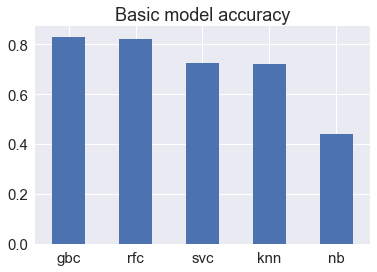

In [48]:
model_acc.sort_values(by='basic_acc', ascending=False).basic_acc.plot(kind='bar', legend=False, rot=0)
plt.title('Basic model accuracy')

In [49]:
#try to find importance of variables

Tree train acc: 0.993579454254


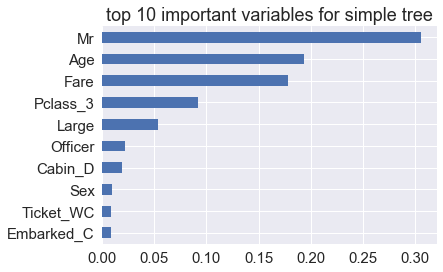

In [50]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(train_X, train_y)
imp = pd.DataFrame(tree.feature_importances_,
                         columns = ['Importance'],
                         index = train_X.columns)
imp = imp.sort_values(['Importance'], ascending=True)
imp[-10:].plot(kind='barh', legend=False)
plt.title('top 10 important variables for simple tree')
print('Tree train acc:',tree.score(train_X, train_y))

In [51]:
#Investigating removal of some inputs. Seems ticket/embarked not all that important
#maybe worth changing to has_cabin 1/0 and bagging ages?

In [52]:
cabin.rename(columns={'Cabin_U':'No_cabin'}, inplace=True)
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,No_cabin
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [53]:
age_bins = (-2, 0, 5, 12, 18, 25, 35, 60, 120)
ag = [0,1,2,3,4,5,6,7]
#age_groups = ['unknown', 'baby', 'child', 'teen', 'student','youngadult','adult','senior']
age_split = pd.cut(full.Age.fillna(-1), age_bins, labels=ag).astype(int)
age_split.head()

0    4
1    6
2    5
3    5
4    5
Name: Age, dtype: int32

In [54]:
fare_bins = (-2, 0, 8, 15, 31, 1000)
fg = [0,1,2,3,4]
fare_split = pd.cut(full.Fare.fillna(-1), fare_bins, labels=fg).astype(int)
fare_split.head()

0    1
1    4
2    1
3    4
4    2
Name: Fare, dtype: int32

In [55]:
sex = sex.astype(int)

In [56]:
full_X = pd.concat([age_split, fare_split, pclass, sex, family, title, cabin['No_cabin']],axis=1)
full_X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex,Large,Single,Small,Master,Miss,Mr,Mrs,Officer,Royalty,No_cabin
0,4,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
1,6,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,5,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,5,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,5,2,0,0,1,1,0,1,0,0,0,1,0,0,0,1


In [57]:
train_valid_X = full_X[0:891]
train_valid_y = titanic.Survived
test_X = full_X[891:]
train_X, valid_X, train_y, valid_y = train_test_split(
    train_valid_X, train_valid_y, test_size=0.3)

combined_X = train_X.append(valid_X)
combined_y = train_y.append(valid_y)

print(full_X.shape, train_X.shape, valid_X.shape, train_y.shape, valid_y.shape, test_X.shape, combined_X.shape, combined_y.shape)

(1309, 16) (623, 16) (268, 16) (623,) (268,) (418, 16) (891, 16) (891,)


In [58]:
#Redoing basic training with revised inputs

In [59]:
name = 'rfc'
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
model_acc.loc[name,'revised_acc']=cv_score

name = 'gbc'
model = GradientBoostingClassifier()
model.fit(train_X, train_y)
cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
model_acc.loc[name,'revised_acc']=cv_score

name = 'knn'
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)
cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
model_acc.loc[name,'revised_acc']=cv_score

name = 'svc'
model = SVC()
model.fit(train_X, train_y)
cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
model_acc.loc[name,'revised_acc']=cv_score

name = 'nb'
model = GaussianNB()
model.fit(train_X, train_y)
cv_score = cross_val_score(model, combined_X, combined_y, cv=5).mean()
model_acc.loc[name,'revised_acc']=cv_score

In [60]:
model_acc

,basic_acc,revised_acc,tuned_acc,tuned_params,best_acc
rfc,0.822676,0.836097,NaN,NaN,NaN
gbc,0.830517,0.829381,NaN,NaN,NaN
knn,0.719399,0.837202,NaN,NaN,NaN
svc,0.726128,0.834993,NaN,NaN,NaN
nb,0.439928,0.810279,NaN,NaN,NaN


Text(0.5,1,'Basic/Improved Accuracies of models')

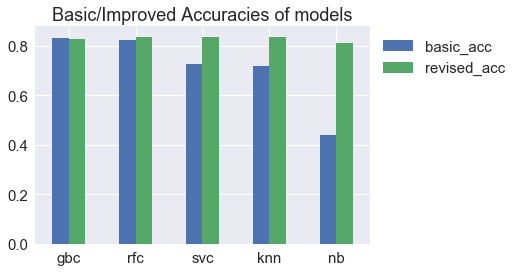

In [61]:
model_acc[['basic_acc','revised_acc']].sort_values(by='basic_acc', ascending=False).plot(kind='bar', rot=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Basic/Improved Accuracies of models')

In [62]:
#Huge increase for Naieve Bayes, similar for others. May help prevent overfitting later?

In [63]:
#now for some fine tuning

In [64]:
name = 'rfc'
model = RandomForestClassifier(n_estimators=50)

params = {'n_estimators': [25, 50, 80, 100, 120, 150],
         'max_depth': [3,5,8,10,15]}

grid = GridSearchCV(model, param_grid=params, 
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid = grid.fit(train_X,train_y)

print('best acc:',grid.best_score_)
print('best params:',grid.best_params_)

model_acc.loc[name,2:4]=grid.best_score_ , grid.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.0s finished


best acc: 0.84430176565
best params: {'max_depth': 5, 'n_estimators': 50}


In [65]:
#selecting and visualising optimal features? (tree only, not fully implemented as similar accuracy)

train: 0.892455858748 test: 0.817164179104
Optimal number of features : 7


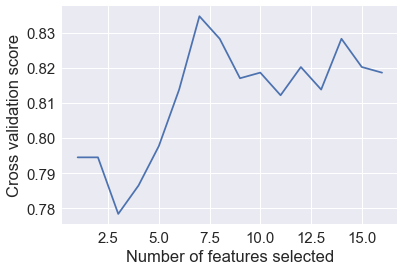

In [66]:
rfecv = RFECV( estimator = model , step = 1 , cv = StratifiedKFold( train_y , 2 ) , scoring = 'accuracy' )
rfecv.fit( train_X , train_y )

print ('train:', rfecv.score( train_X , train_y ) , 
       'test:', rfecv.score( valid_X , valid_y ))
print( "Optimal number of features : %d" % rfecv.n_features_ )

#Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

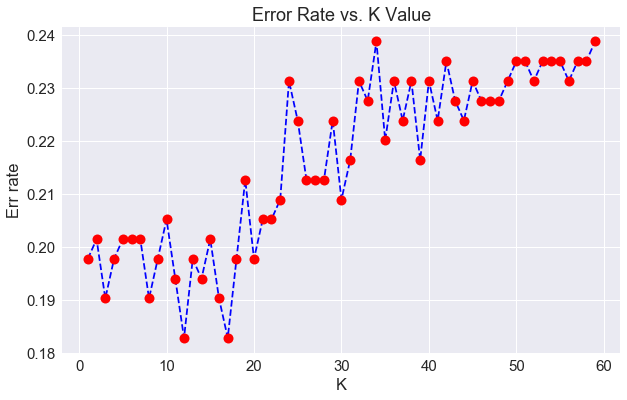

In [67]:
model = KNeighborsClassifier(n_neighbors=5)

err_list = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_y)
    pred_i = knn.predict(valid_X)
    err_list.append(np.mean(pred_i != valid_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,60),err_list,c='blue',ls='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Err rate')
plt.show()

In [68]:
name = 'knn'
model = KNeighborsClassifier(n_neighbors=3)

params = {'n_neighbors': list(range(1,60))}

grid = GridSearchCV(model, param_grid=params, 
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid = grid.fit(train_X,train_y)

print('best acc:',grid.best_score_)
print('best params:',grid.best_params_)

model_acc.loc[name,2:4]=grid.best_score_ , grid.best_params_

Fitting 5 folds for each of 59 candidates, totalling 295 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s


best acc: 0.842696629213
best params: {'n_neighbors': 9}


[Parallel(n_jobs=-1)]: Done 295 out of 295 | elapsed:   11.0s finished


In [69]:
name = 'svc'
model = SVC(kernel='linear',C=0.2)

params = {'C':[0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5],
         'kernel': ['rbf','linear','sigmoid']}

grid = GridSearchCV(model, param_grid=params, 
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid = grid.fit(train_X,train_y)

print('best acc:',grid.best_score_)
print('best params:',grid.best_params_)

model_acc.loc[name,2:4]=grid.best_score_ , grid.best_params_

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s


best acc: 0.842696629213
best params: {'C': 1.5, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   11.6s finished


In [70]:
name = 'gbc'
model = GradientBoostingClassifier()

params = {'learning_rate':[0.05, 0.1, 0.15],
         'n_estimators': [50, 100, 150, 250],
         'max_depth': [2,3,4,5,6,10]}

grid = GridSearchCV(model, param_grid=params, 
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid = grid.fit(train_X,train_y)

print('best acc:',grid.best_score_)
print('best params:',grid.best_params_)

model_acc.loc[name,2:4]=grid.best_score_ , grid.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   27.9s finished


best acc: 0.847512038523
best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [71]:
#nb has no fine tuning parameters. 

Text(0.5,1,'Basic/Improved/Tuned Accuracies of models')

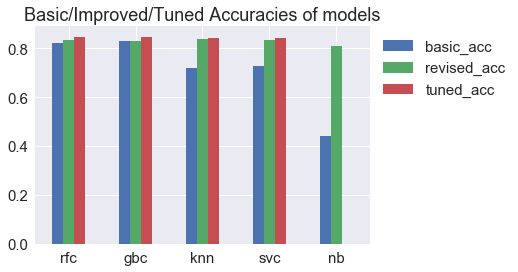

In [72]:
model_acc.iloc[:,:3].plot(kind='bar', rot=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Basic/Improved/Tuned Accuracies of models')

In [73]:
#and plotting just basic/best:

In [74]:
model_acc.iloc[:,4] = model_acc.iloc[:,:3].max(axis=1)

Text(0.5,1,'Basic/Best Accuracies of models')

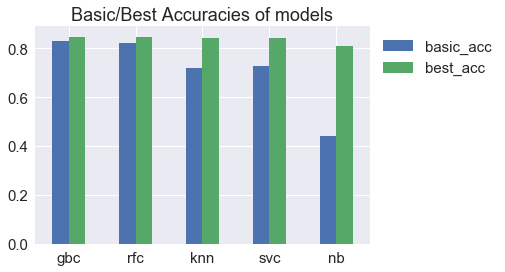

In [75]:
model_acc.iloc[:,[0,4]].sort_values(by='best_acc', ascending=False).plot(kind='bar', rot=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Basic/Best Accuracies of models')

In [76]:
#playing with homebrew ensembling

In [77]:
model_acc

,basic_acc,revised_acc,tuned_acc,tuned_params,best_acc
rfc,0.822676,0.836097,0.844302,"{'max_depth': 5, 'n_estimators': 50}",0.844302
gbc,0.830517,0.829381,0.847512,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.847512
knn,0.719399,0.837202,0.842697,{'n_neighbors': 9},0.842697
svc,0.726128,0.834993,0.842697,"{'C': 1.5, 'kernel': 'rbf'}",0.842697
nb,0.439928,0.810279,NaN,NaN,0.810279


In [78]:
model_acc.loc['rfc','tuned_params']['max_depth']

5

In [79]:
#rfc
tp_md = model_acc.loc['rfc','tuned_params']['max_depth']
tp_n = model_acc.loc['rfc','tuned_params']['n_estimators']
rfc = RandomForestClassifier(max_depth=tp_md, n_estimators=tp_n)
rfc.fit(train_X, train_y)

#gbc
tp_lr = model_acc.loc['gbc','tuned_params']['learning_rate']
tp_md = model_acc.loc['gbc','tuned_params']['max_depth']
tp_n = model_acc.loc['gbc','tuned_params']['n_estimators']
gbc = GradientBoostingClassifier(learning_rate=tp_lr, max_depth=tp_md, n_estimators=tp_n)
gbc.fit(train_X, train_y)

#knn
tp_n = model_acc.loc['knn','tuned_params']['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=tp_n)
knn.fit(train_X, train_y)

#svc
tp_c = model_acc.loc['svc','tuned_params']['C']
tp_kernel = model_acc.loc['svc','tuned_params']['kernel']
svc = SVC(C=tp_c, kernel=tp_kernel)
svc.fit(train_X, train_y)

nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB(priors=None)

In [80]:
models = [rfc, gbc, knn, svc, nb]
guess = np.zeros(combined_X.shape[0])

for m in models:
    guess+=m.predict(combined_X)
    
guess = np.round(guess/5)

In [81]:
print(confusion_matrix(combined_y,guess))

[[491  58]
 [ 82 260]]


In [82]:
print(classification_report(combined_y, guess))

             precision    recall  f1-score   support

        0.0       0.86      0.89      0.88       549
        1.0       0.82      0.76      0.79       342

avg / total       0.84      0.84      0.84       891



In [83]:
model_acc.loc['ens','best_acc'] = accuracy_score(combined_y,guess)

In [84]:
model_acc

,basic_acc,revised_acc,tuned_acc,tuned_params,best_acc
rfc,0.822676,0.836097,0.844302,"{'max_depth': 5, 'n_estimators': 50}",0.844302
gbc,0.830517,0.829381,0.847512,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.847512
knn,0.719399,0.837202,0.842697,{'n_neighbors': 9},0.842697
svc,0.726128,0.834993,0.842697,"{'C': 1.5, 'kernel': 'rbf'}",0.842697
nb,0.439928,0.810279,NaN,NaN,0.810279
ens,NaN,NaN,NaN,NaN,0.842873


Text(0.5,1,'Best accuracy of models incl. ensemble')

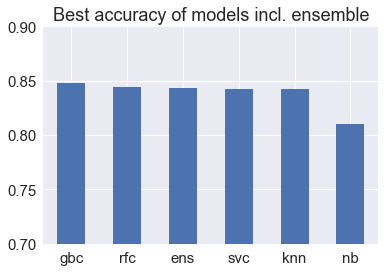

In [85]:
model_acc['best_acc'].sort_values(ascending=False).plot(kind='bar', ylim=[0.7,0.9], rot=0)
plt.title('Best accuracy of models incl. ensemble')

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(train_X,train_y, eval_set=[(train_valid_X, train_valid_y)], early_stopping_rounds=5)

[0]	validation_0-rmse:0.487925
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:0.47676
[2]	validation_0-rmse:0.46645
[3]	validation_0-rmse:0.456991
[4]	validation_0-rmse:0.448223
[5]	validation_0-rmse:0.440209
[6]	validation_0-rmse:0.432836
[7]	validation_0-rmse:0.426058
[8]	validation_0-rmse:0.419834
[9]	validation_0-rmse:0.414073
[10]	validation_0-rmse:0.408893
[11]	validation_0-rmse:0.404052
[12]	validation_0-rmse:0.399656
[13]	validation_0-rmse:0.395638
[14]	validation_0-rmse:0.391946
[15]	validation_0-rmse:0.388513
[16]	validation_0-rmse:0.384798
[17]	validation_0-rmse:0.381421
[18]	validation_0-rmse:0.378224
[19]	validation_0-rmse:0.375421
[20]	validation_0-rmse:0.372755
[21]	validation_0-rmse:0.370435
[22]	validation_0-rmse:0.368157
[23]	validation_0-rmse:0.366125
[24]	validation_0-rmse:0.364396
[25]	validation_0-rmse:0.362639
[26]	validation_0-rmse:0.361061
[27]	validation_0-rmse:0.359088
[28]	validation_0-rmse:0.357296
[29]	validation_0-rm

[251]	validation_0-rmse:0.32624
[252]	validation_0-rmse:0.326145
[253]	validation_0-rmse:0.326124
[254]	validation_0-rmse:0.326003
[255]	validation_0-rmse:0.325985
[256]	validation_0-rmse:0.325874
[257]	validation_0-rmse:0.325826
[258]	validation_0-rmse:0.325764
[259]	validation_0-rmse:0.325751
[260]	validation_0-rmse:0.325752
[261]	validation_0-rmse:0.32565
[262]	validation_0-rmse:0.325653
[263]	validation_0-rmse:0.325613
[264]	validation_0-rmse:0.325581
[265]	validation_0-rmse:0.32557
[266]	validation_0-rmse:0.32548
[267]	validation_0-rmse:0.32544
[268]	validation_0-rmse:0.325413
[269]	validation_0-rmse:0.325413
[270]	validation_0-rmse:0.325384
[271]	validation_0-rmse:0.325351
[272]	validation_0-rmse:0.325356
[273]	validation_0-rmse:0.325273
[274]	validation_0-rmse:0.325248
[275]	validation_0-rmse:0.325183
[276]	validation_0-rmse:0.325158
[277]	validation_0-rmse:0.325157
[278]	validation_0-rmse:0.32511
[279]	validation_0-rmse:0.325074
[280]	validation_0-rmse:0.325032
[281]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [87]:
xgb_acc = accuracy_score(combined_y, xgb.predict(combined_X).round())
print(xgb_acc)

0.854096520763


Text(0.5,1,'Best accuracy of models incl. xgb')

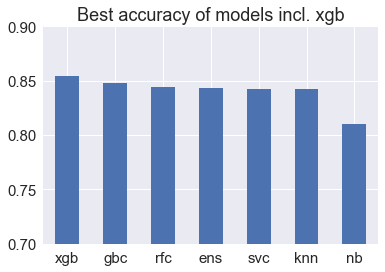

In [88]:
model_acc.loc['xgb','best_acc'] = xgb_acc

model_acc['best_acc'].sort_values(ascending=False).plot(kind='bar', ylim=[0.7,0.9], rot=0)
plt.title('Best accuracy of models incl. xgb')

In [89]:
combined_X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex,Large,Single,Small,Master,Miss,Mr,Mrs,Officer,Royalty,No_cabin
517,0,3,0,0,1,1,0,1,0,0,0,1,0,0,0,1
356,4,4,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4,5,2,0,0,1,1,0,1,0,0,0,1,0,0,0,1
182,2,4,0,0,1,1,1,0,0,1,0,0,0,0,0,1
399,5,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1


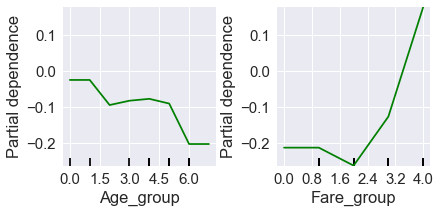

In [91]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
my_plots = plot_partial_dependence(gbc,       
                                   features=[0, 1], # column numbers of plots we want to show
                                   X=combined_X,            # raw predictors data.
                                   feature_names=['Age_group', 'Fare_group'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

#only works for gbc atm.